In [1]:
import pyEX as p
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = p.Client(api_token='Tpk_8449a05873f3433b8f96798dfffee935', version='sandbox')

msft_df = c.chartDF('MSFT', timeframe='1y')
ibm_df = c.chartDF('IBM', timeframe='1y')

In [3]:
msft_df.head()

,open,close,high,low,volume,uOpen,uClose,uHigh,uLow,uVolume,change,changePercent,label,changeOverTime
date,,,,,,,,,,,,,,
2019-10-17,147.82,144.43,141.68,141.14,22954787,145.46,145.61,147.71,145.70,23168351,0.00,0.0000,"Oct 17, 19",0.000000
2019-10-18,146.06,138.28,140.00,138.37,33499974,142.81,138.77,146.00,143.39,33336570,-2.29,-1.6358,"Oct 18, 19",-0.016671
2019-10-21,141.48,141.88,140.80,138.69,21054536,138.46,143.30,142.80,142.82,21261024,1.03,0.7640,"Oct 21, 19",-0.009030
2019-10-22,142.62,139.22,142.51,142.94,29251524,142.24,139.06,144.02,136.54,28848077,-2.07,-1.4951,"Oct 22, 19",-0.024203
2019-10-23,143.63,138.12,142.18,135.80,31956214,140.49,141.04,141.55,140.26,32491555,0.88,0.6580,"Oct 23, 19",-0.017944


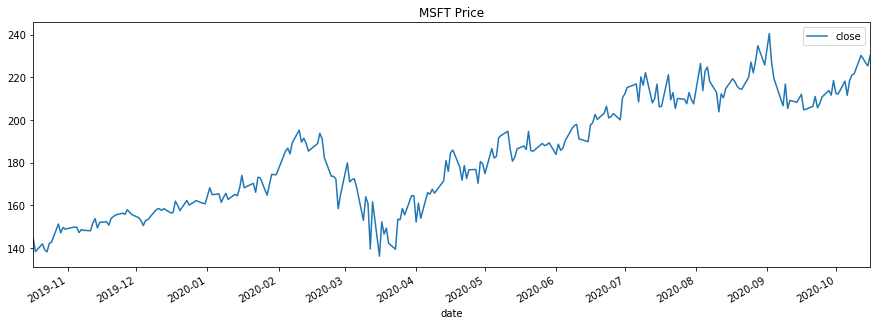

In [4]:
# simple line chart (pandas is intergrated with matplotlib, so we can plot directly with DataFrame)

msft_df.close.plot(figsize=(15,5), title='MSFT Price', legend=True)

In [5]:
# figsize: it's a python tuple, defining the width and the height of the chart
# title: the header on the top middle of the chart
# legend: show/hide legend

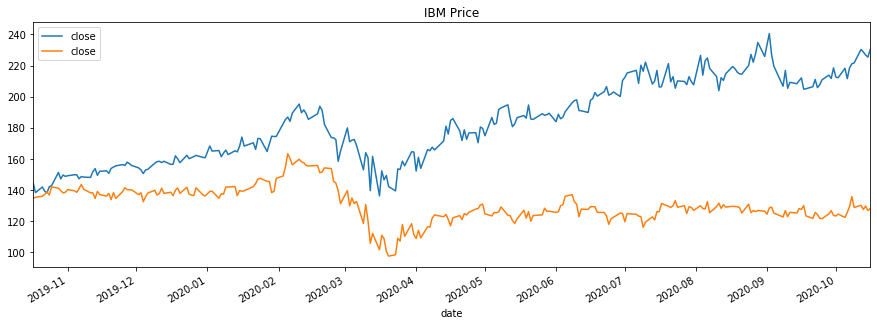

In [6]:
msft_df.close.plot(figsize=(15,5), title='MSFT Price', legend=True)
ibm_df.close.plot(figsize=(15,5), title='IBM Price', legend=True)

In [8]:
msft_df['return'] = np.log(msft_df.close).diff()
ibm_df['return'] = np.log(ibm_df.close).diff()

return_df = msft_df[['return']].join(
    ibm_df[['return']], how='inner', lsuffix='_msft', rsuffix='_ibm'
)

return_df.head()

,return_msft,return_ibm
date,,
2019-10-17,NaN,NaN
2019-10-18,-0.043514,0.004668
2019-10-21,0.025701,0.004940
2019-10-22,-0.018926,0.008350
2019-10-23,-0.007933,0.012396


In [9]:
# calculating the cumulative returns from the log regurns:

In [10]:
cum_return_df = (1 + return_df).cumprod() - 1
cum_return_df.head()

,return_msft,return_ibm
date,,
2019-10-17,NaN,NaN
2019-10-18,-0.043514,0.004668
2019-10-21,-0.018932,0.009631
2019-10-22,-0.037500,0.018062
2019-10-23,-0.045135,0.030683


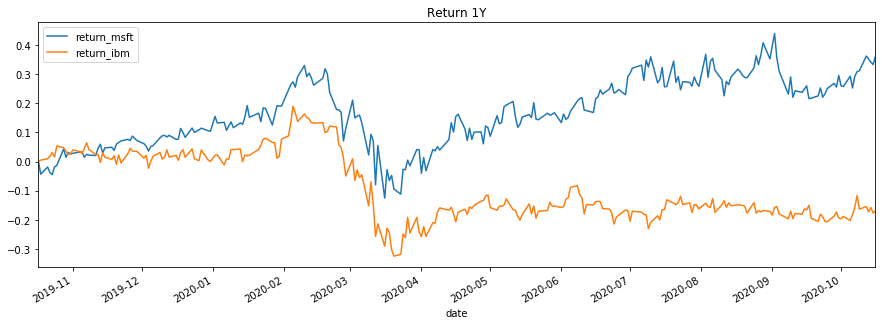

In [11]:
cum_return_df = cum_return_df.fillna(0)

cum_return_df.plot(figsize=(15,5), title='Return 1Y', legend=True)

In [12]:
# scatter plotting:

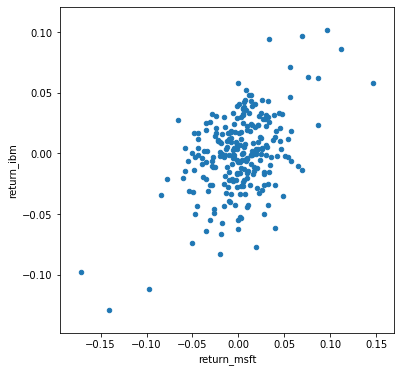

In [13]:
return_df.plot(kind='scatter', figsize=(6,6), x='return_msft', y='return_ibm')

In [14]:
# plotting bar charts:

In [16]:
return_1y = cum_return_df.tail(1)
return_1y.index = ['1Y']
return_1y

,return_msft,return_ibm
1Y,0.361201,-0.168981


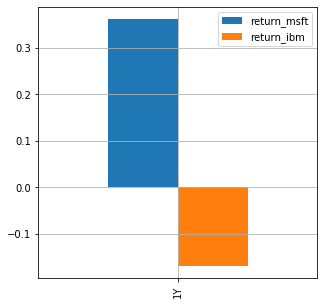

In [17]:
return_1y.plot(kind='bar', figsize=(5,5), grid=True)

In [18]:
# two axes and two scales:

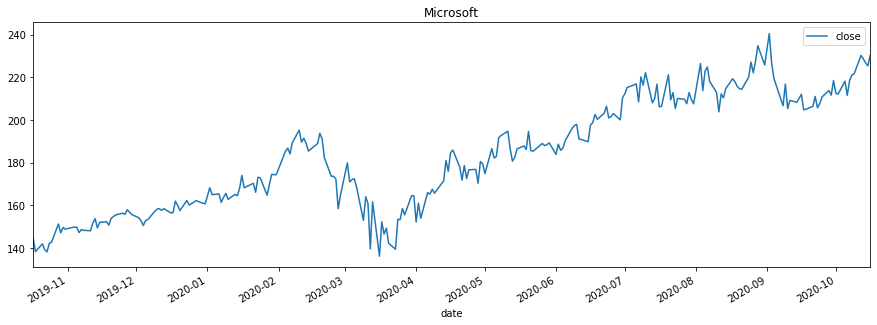

In [19]:
# first, we plot a regular line chart of price:

msft_df.close.plot(figsize=(15,5), legend=True, title='Microsoft')

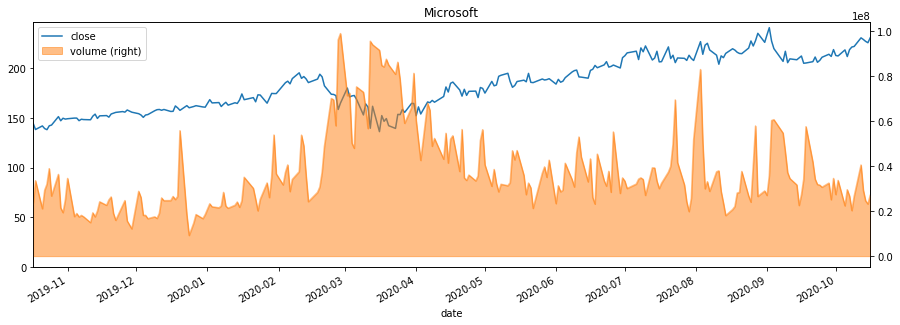

In [25]:
# second, we add another "area" plot (basically a line with the area below filled with colour)

msft_df.close.plot(figsize=(15,5), legend=True, title='Microsoft')

msft_df.volume.plot(
    kind='area', figsize=(15,5), legend=True,
    secondary_y=True, alpha=0.5
)

In [21]:
# this time we used two more parameters:
# 1. secondary_y, have the plot using secondary y axis (right handside)
# 2. alpha: to make the area transparent, value between 0 and 1, where 0 means fully transparent

In [26]:
# let's now improve the code for plotting the same chart:

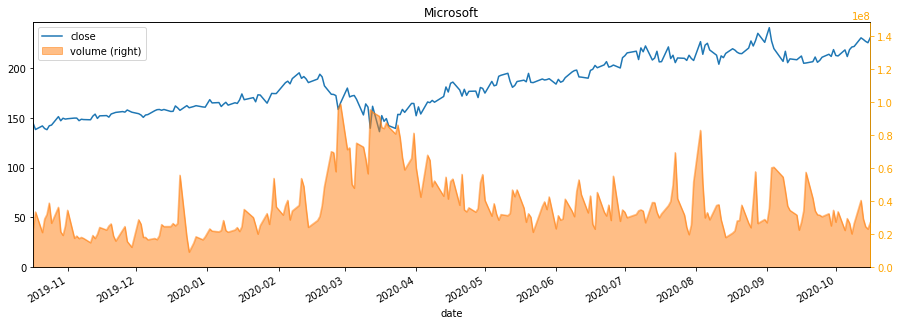

In [27]:
msft_df.close.plot(figsize=(15,5), legend=True, title='Microsoft')

ax = msft_df.volume.plot(
    kind='area', figsize=(15,5), legend=True,
    secondary_y=True, alpha=0.5
)

ax.set_ybound(0, msft_df.volume.max() * 1.5)

ax.spines['right'].set_color('orange')
ax.tick_params(axis='y', colors='orange')
ax.yaxis.label.set_color('orange')

In [28]:
# fill between lines

In [29]:
# start by calculating the rolling std and upper/lower bands
msft_df['stddev'] = msft_df.close.rolling(30).std()
msft_df['lower'] = msft_df.close - msft_df.stddev
msft_df['upper'] = msft_df.close + msft_df.stddev

msft_chart_data = msft_df.dropna()[['close', 'lower', 'upper']]

msft_chart_data.head()

,close,lower,upper
date,,,
2019-11-27,157.88,152.528876,163.231124
2019-11-29,155.67,150.251052,161.088948
2019-12-02,154.16,149.089745,159.230255
2019-12-03,152.87,148.000479,157.739521
2019-12-04,150.50,146.093290,154.906710


In [30]:
# then we plot the simple line chart, after add the highlight of the bands with the function "fill_between"

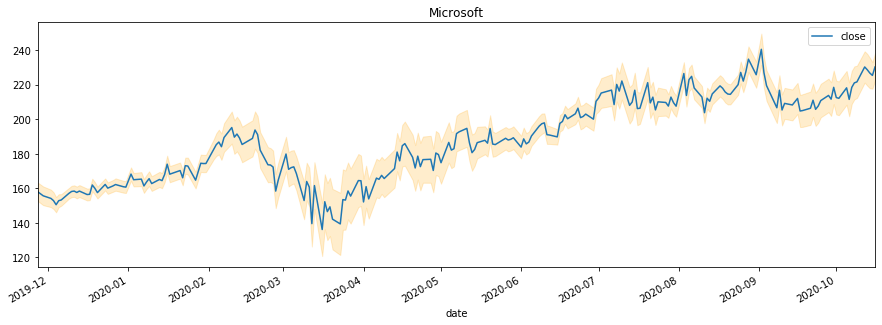

In [31]:
msft_chart_data.close.plot(figsize=(15, 5), legend=True, title='Microsoft')

plt.fill_between(
    x=msft_chart_data.index, y1=msft_chart_data.lower, y2=msft_chart_data.upper,
    color='orange', alpha=0.2
)

In [32]:
# understanding the inputs: x is the x-axis values; y1 is one of the band series; y2 is another series of the band
# color is the colour of the band; alpha is the transparency level of the band